# Hierarchical clustering with 2D toy datasets
***
- 將階層式聚類套用在 2D 樣板資料上, 來觀察幾種不同參數的結果有何不同

In [1]:
# 載入套件
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [2]:
# 設定 2D 樣板資料
n_samples = 1500
random_state = 100

noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
datasets = [noisy_moons, blobs, no_structure]



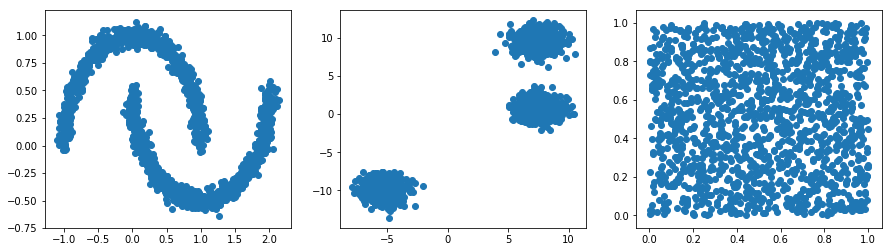

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, dataset in zip(axes.ravel(), datasets):
    X = dataset[0]
    y = dataset[1]
    ax.scatter(X[:, 0], X[:, 1])

# 作業
* 試著完成剩下三種 2D 樣板資料的繪圖, 並觀察有何不同

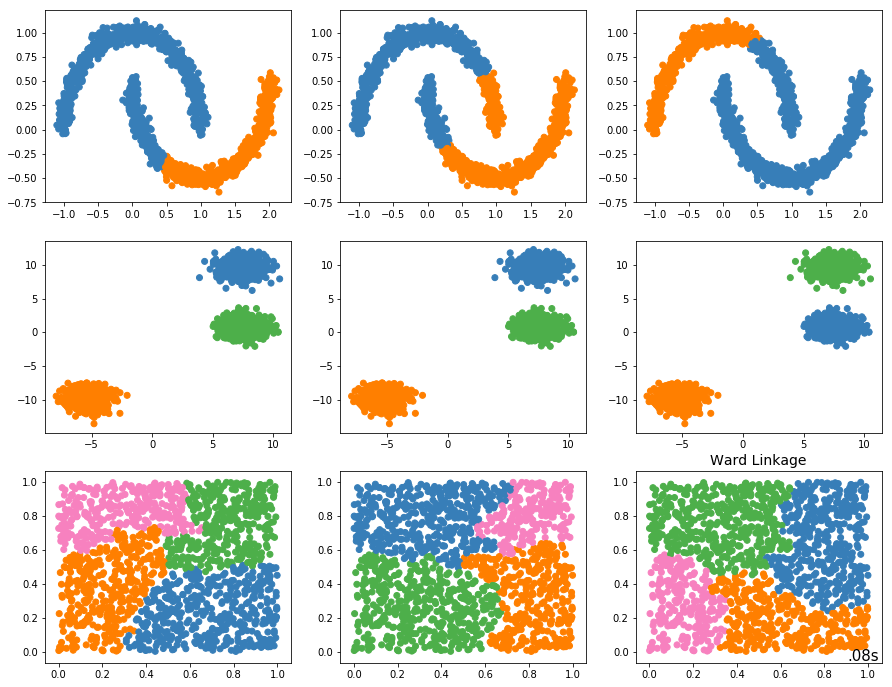

In [4]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
params = [2, 3, 4]
for i, dataset in enumerate(datasets):
    X = dataset[0]
    y = dataset[1]
    ward = cluster.AgglomerativeClustering(n_clusters=params[i], linkage="ward")
    complete = cluster.AgglomerativeClustering(n_clusters=params[i], linkage="complete")
    average = cluster.AgglomerativeClustering(n_clusters=params[i], linkage="average")
    clustering_algorithms = (
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Ward Linkage', ward))
    
    for j, (name, algorithm) in enumerate(clustering_algorithms):
        # t0 / t1 : 紀錄時間差
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        y_pred = algorithm.labels_
        if i==0:
            plt.title(name, size=14)
        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        axes[i][j].scatter(X[:, 0], X[:, 1], c=colors[y_pred])
        axes[i][j].text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'), transform=plt.gca().transAxes, size=15, 
                       horizontalalignment='right')